# Wood Classifier

## Project Description
In a project, a wood scientist,measured 5 chemical components (X) of several wood samples.  She is studying three types of solid wood - Oak, Pine, Cherry.
<img src='Wood.jpg' width=600 height=400/></a>
      

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

### Importing the Dataset

In [2]:
dataset = pd.read_csv('Wood.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset

,X1,X2,X3,X4,X5,Type
0,13.057325,5.095541,10.509554,3.184713,4.173285,Pine
1,12.420382,6.050955,10.191083,3.503185,3.170150,Cherry
2,16.560510,11.464968,3.503185,0.636943,9.284378,Oak
3,13.375796,6.687898,9.235669,2.866242,0.923786,Pine
4,12.738853,6.687898,9.554140,2.866242,1.097113,Pine
...,...,...,...,...,...,...
145,11.464968,5.414013,10.191083,4.777070,5.380337,Cherry
146,13.375796,6.369427,9.554140,2.866242,1.917863,Pine
147,16.242038,9.872611,5.414013,0.636943,2.279927,Oak
148,13.375796,5.732484,9.554140,3.184713,7.453342,Pine


### Encoding the Output Data
Here, we replace Oak, Pine, and Cherry with Labels 0,1, and 2

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Manual PCA
<font color=red> Almost all the times, we use the Built-in Function to find the PCA, but to get an insight on what PCA does and how it works, we will check these 5 steps to Apply PCA to this dataset.<br>
<font color=blue>The goal is to find the direction where the variance of the data is max

In [5]:
# just a check
np.var(X[:,0])

2.4820299212719203

### Step 1. Find the Covariance of Matrix X
* What is the Covariance Matrix?<br>
Variance measures the variation of a single random variable (like the height of a person in a population), whereas covariance is a measure of how much two random variables vary together (like the height of a person and the weight of a person in a population). <br>
* How to compute the Covariance Matrix? <br>
Watch this video (Optional): https://www.youtube.com/watch?v=0GzMcUy7ZI0 <br>

In [6]:
XT=np.transpose(X)
C=np.cov(XT)
C

array([[ 2.49868784,  3.3020657 , -3.79910226, -1.99207613,  0.69230565],
       [ 3.3020657 ,  5.64400696, -6.01839083, -2.89705043,  0.8798853 ],
       [-3.79910226, -6.01839083,  6.64428804,  3.16467363, -1.08181011],
       [-1.99207613, -2.89705043,  3.16467363,  1.72635888, -0.54005786],
       [ 0.69230565,  0.8798853 , -1.08181011, -0.54005786,  8.78632654]])

### Step 2. Find the Eigenvalues and Eigenvectors of Matrix C

In [7]:
e,V=np.linalg.eig(C)
e

array([1.62627658e+01, 8.42673154e+00, 4.67622704e-01, 8.23577793e-03,
       1.34312491e-01])

In [8]:
# printing in a short format:
print("Eigenvalues are=", "%10.2f" %e[0],"%10.2f" %e[1],"%10.2f" %e[2],"%10.2f" %e[3],"%10.2f" %e[4] )

Eigenvalues are=      16.26       8.43       0.47       0.01       0.13


In [9]:
# Checking the Eigenvectors
V

array([[ 0.36661479,  0.07086236,  0.75050828,  0.50985128,  0.19329024],
       [ 0.57274398,  0.13655214, -0.53279762,  0.48987705, -0.35981247],
       [-0.62910223, -0.1355427 ,  0.12911239,  0.49649961, -0.56804637],
       [-0.30932404, -0.06541546, -0.36880653,  0.50353961,  0.71447117],
       [ 0.21472528, -0.97656594, -0.01325713,  0.00285373, -0.00530336]])

### Step 3. Sorting Eigenvalues and Their Associated Eigenvectors from Largest to Smallest

In [10]:
idx = e.argsort()[::-1]   
e = e[idx]
V = V[:,idx]

In [11]:
print("Eigenvalues are=", "%10.2f" %e[0],"%10.2f" %e[1],"%10.2f" %e[2],"%10.2f" %e[3],"%10.2f" %e[4] )

Eigenvalues are=      16.26       8.43       0.47       0.13       0.01


In [12]:
V

array([[ 0.36661479,  0.07086236,  0.75050828,  0.19329024,  0.50985128],
       [ 0.57274398,  0.13655214, -0.53279762, -0.35981247,  0.48987705],
       [-0.62910223, -0.1355427 ,  0.12911239, -0.56804637,  0.49649961],
       [-0.30932404, -0.06541546, -0.36880653,  0.71447117,  0.50353961],
       [ 0.21472528, -0.97656594, -0.01325713, -0.00530336,  0.00285373]])

### Step 4. Project the data (X) on the dirction of Eigenvectors

In [13]:
Z0=np.dot(X,V[:,0])

In [14]:
# Math check: The variance in Z1 must be equal to first Eigenvalue.
np.var(Z0)

16.154347319985767

As you see, the variance in Z1 data is equal to the Eigenvalue 1 (with a very small numerical error!)

In [15]:
# What about Z2?
Z1=np.dot(X,V[:,1])
np.var(Z1)

8.370553327654271

In [16]:
# You may check the rest..
Z2=np.dot(X,V[:,2])
Z3=np.dot(X,V[:,3])
Z4=np.dot(X,V[:,4])

### Step 5. Calculate the contribution of each variable

In [17]:
# Using only Z0:
contribution=e[0]/(e[0]+e[1]+e[2]+e[3]+e[4])
contribution

0.6428054939255528

It means: Z0 alone can describe 64% of the data (i.e. the variation in data). 

In [18]:
# Using Z0 and Z1:
contribution=(e[0]+e[1])/(e[0]+e[1]+e[2]+e[3]+e[4])
contribution

0.9758822539848215

It means: Z0 and Z1 can describe about 98% of the data (i.e. the variation in data).<br>
<font color=red> In simple words, we say, using Z0 and Z1, 98% of the information preserves. 

### Step 6. Let's Visualize 

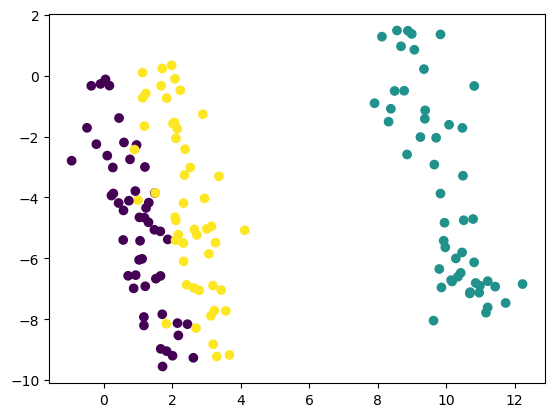

In [19]:
plt.scatter(Z0,Z1,c=y)  # here I used y (the label) for markers color..
# Each color shows one type of wood

## PCA with SKLearn

In [20]:
from sklearn.decomposition import PCA
PrinCom=PCA(n_components=2)
PrinCom.fit(X)
Z=PrinCom.transform(X)

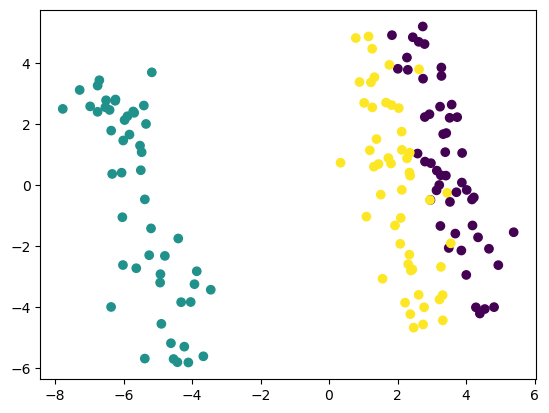

In [21]:
plt.scatter(Z[:,0],Z[:,1],c=y) 

### Let's Check the Results with Manual Method

In [22]:
np.var(Z[:,0])

16.15434731998577

which is exactly the same as the manual method results :) 

##### End